# N2V Training

Here we train N2V on single noisy images. This allows us to create a pseudo-ground truth, which further allows estimation of the noise model in the notebooks ```1a_CreateNoiseModel_Calibration.ipynb``` or ```1b_CreateNoiseModel_Bootstrap.ipynb```. Use this (```1_N2VTraining.ipynb```) and ```2_N2VPrediction.ipynb``` if you wish to test the Bootstrap Mode or in case the calibration data is not available.

In [2]:
import warnings
warnings.filterwarnings('ignore')
import matplotlib.pyplot as plt

from ppn2v.unet import UNet

from ppn2v.pn2v import utils
from ppn2v.pn2v import training
from tifffile import imread
# See if we can use a GPU
device=utils.getDevice()

CUDA available? True


### Download data
Download the data from  https://zenodo.org/record/5156937/files/Mouse%20actin.zip?download=1. Here we show the pipeline for Mouse actin dataset. Save the dataset at an appropriate location. For us, the path is data folder which exists at `../../../`. For Mouse actin, the data to be denoised is named ```sample_attempt2.tif```. 

In [3]:
# Download data
import os
import urllib
import zipfile

if not os.path.isdir('../../../data/Mouse actin/'):
    os.mkdir('../../../data/Mouse actin/')

zipPath="../../../data/Mouse actin/Mouse_actin.zip"
if not os.path.exists(zipPath):  
    data = urllib.request.urlretrieve(' https://zenodo.org/record/5156937/files/Mouse%20actin.zip?download=1', zipPath)
    with zipfile.ZipFile(zipPath, 'r') as zip_ref:
        zip_ref.extractall("../../../data/Mouse actin/")


### Load Data
#### Check ```filename``` and specify the ```dataName```  

In [6]:
path='../../../data/Mouse actin/Mouse actin/'
fileName='sample_attempt2.tif'
dataName='mouseactin' # This will be used to name the noise2void model

Run the cells below

In [7]:
data=imread(path+fileName)
nameModel=dataName+'_n2v'

### Create the Network and Train it
This can take a while.
`numOfEpochs=200` and `stepsPerEpoch=10` gives best results for `Mouse actin` dataset.

In [8]:
# The N2V network requires only a single output unit per pixel
net = UNet(1, depth=3)

# Split training and validation data.
my_train_data=data[:-5].copy()
my_val_data=data[-5:].copy()

# Start training.
trainHist, valHist = training.trainNetwork(net=net, trainData=my_train_data, valData=my_val_data,
                                           postfix= nameModel, directory=path, noiseModel=None,
                                           device=device, numOfEpochs= 200, stepsPerEpoch=10, 
                                           virtualBatchSize=20, batchSize=1, learningRate=1e-3)

Epoch 0 finished      
avg. loss: 0.46094180047512057+-(2SEM)0.19052982753802208      
Epoch 1 finished      
avg. loss: 0.4138747498393059+-(2SEM)0.14197979540357533      
Epoch 2 finished      
avg. loss: 0.36406237334012986+-(2SEM)0.13301342899481083      
Epoch 3 finished      
avg. loss: 0.34059788696467874+-(2SEM)0.12392284865227882      
Epoch 4 finished      
avg. loss: 0.321358472853899+-(2SEM)0.1218787240997256      
Epoch 5 finished      
avg. loss: 0.2423263806849718+-(2SEM)0.07996734154555314      
Epoch 6 finished      
avg. loss: 0.21373227164149283+-(2SEM)0.07439974862857723      
Epoch 7 finished      
avg. loss: 0.42471083253622055+-(2SEM)0.15463747500514477      
Epoch 8 finished      
avg. loss: 0.3623513124883175+-(2SEM)0.11337695405396565      
Epoch 9 finished      
avg. loss: 0.2267055869102478+-(2SEM)0.09549159818428644      
Epoch 10 finished      
avg. loss: 0.37757541351020335+-(2SEM)0.1289235218002933      
Epoch 11 finished      
avg. loss: 0.3313745543360

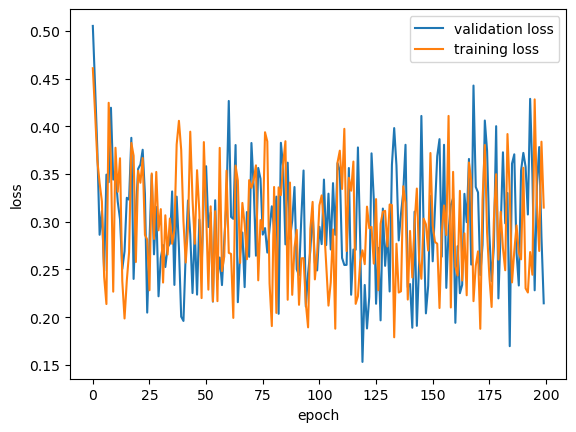

In [9]:
# Let's look at the training and validation loss
plt.xlabel('epoch')
plt.ylabel('loss')
plt.plot(valHist, label='validation loss')
plt.plot(trainHist, label='training loss')
plt.legend()
plt.show()